<a href="https://colab.research.google.com/github/VAbhishek12/excelr/blob/main/Naive%20Bias/Navie_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# prompt: import file in colab

from google.colab import files
uploaded = files.upload()


Saving SalaryData_Train.csv to SalaryData_Train.csv


In [7]:
df_train = pd.read_csv("SalaryData_Train.csv",encoding='ISO-8859-1')
df_train.shape

(30161, 14)

In [10]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [14]:
# prompt: import file in colab

uploaded = files.upload()


Saving SalaryData_Test.csv to SalaryData_Test.csv


In [15]:
df_test = pd.read_csv("SalaryData_Test.csv")
df_test.shape

(15060, 14)

In [16]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [17]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [18]:
df_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [21]:
string_columns = ["workclass","education","educationno","maritalstatus","occupation","relationship","race","sex","capitalgain","capitalloss","hoursperweek","native","Salary"]

In [25]:
# Label encoding....
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
number = LabelEncoder()
for i in string_columns:
    df_train[i]=number.fit_transform(df_train[i])
    df_test[i]=number.fit_transform(df_test[i])

In [26]:
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,12,4,0,1,4,1,24,0,39,37,0
1,50,4,9,12,2,3,0,4,1,0,0,12,37,0
2,38,2,11,8,0,5,1,4,1,0,0,39,37,0
3,53,2,1,6,2,5,0,2,1,0,0,39,37,0
4,28,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,11,2,12,5,4,0,0,0,37,37,0
30157,40,2,11,8,2,6,0,4,1,0,0,39,37,1
30158,58,2,11,8,6,0,4,4,0,0,0,39,37,0
30159,22,2,11,8,4,0,3,4,1,0,0,19,37,0


In [27]:
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,6,4,6,3,2,1,0,0,39,37,0
1,38,2,11,8,2,4,0,4,1,0,0,49,37,0
2,28,1,7,11,2,10,0,4,1,0,0,39,37,1
3,44,2,15,9,2,6,0,2,1,87,0,39,37,1
4,34,2,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,12,4,9,3,4,1,0,0,39,37,0
15056,39,2,9,12,0,9,1,4,0,0,0,35,37,0
15057,38,2,9,12,2,9,0,4,1,0,0,49,37,0
15058,44,2,9,12,0,0,3,1,1,73,0,39,37,0


In [28]:
colnames = df_train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [29]:
colnames = df_test.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [30]:
x_train = df_train[colnames[0:14]].values
y_train = df_train[colnames[-1]].values
x_test = df_test[colnames[0:14]].values
y_test = df_test[colnames[-1]].values

In [34]:
x_train

array([[39,  5,  9, ..., 39, 37,  0],
       [50,  4,  9, ..., 12, 37,  0],
       [38,  2, 11, ..., 39, 37,  0],
       ...,
       [58,  2, 11, ..., 39, 37,  0],
       [22,  2, 11, ..., 19, 37,  0],
       [52,  3, 11, ..., 39, 37,  1]])

In [35]:
x_test

array([[25,  2,  1, ..., 39, 37,  0],
       [38,  2, 11, ..., 49, 37,  0],
       [28,  1,  7, ..., 39, 37,  1],
       ...,
       [38,  2,  9, ..., 49, 37,  0],
       [44,  2,  9, ..., 39, 37,  0],
       [35,  3,  9, ..., 59, 37,  1]])

In [38]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [39]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

# Naive BIas Model......

In [40]:
from sklearn.naive_bayes import MultinomialNB as MB

In [41]:
#MultinomialNB
M_model = MB()
train_pred_multi = M_model.fit(x_train,y_train).predict(x_train)
test_pred_multi = M_model.fit(x_train,y_train).predict(x_test)

In [42]:
train_acc_multi = np.mean(train_pred_multi==y_train)
train_acc_multi

0.7797486820728756

In [43]:
test_acc_multi = np.mean(test_pred_multi==y_test)
test_acc_multi

0.7817397078353253

In [45]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
G_model = GaussianNB()
train_pred_gau= G_model.fit(x_train,y_train).predict(x_train)
test_pred_gau = G_model.fit(x_train,y_train).predict(x_test)

In [46]:
train_acc_gau = np.mean(train_pred_gau==y_train)
train_acc_gau

1.0

In [47]:
test_acc_gau = np.mean(test_pred_gau==y_test)
test_acc_gau

1.0

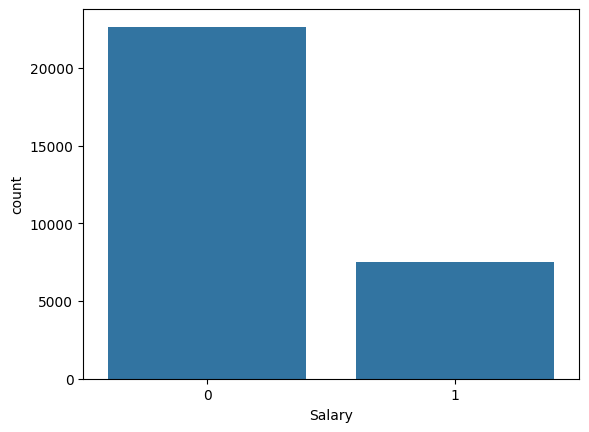

In [49]:
sns.countplot(x='Salary',data=df_train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()


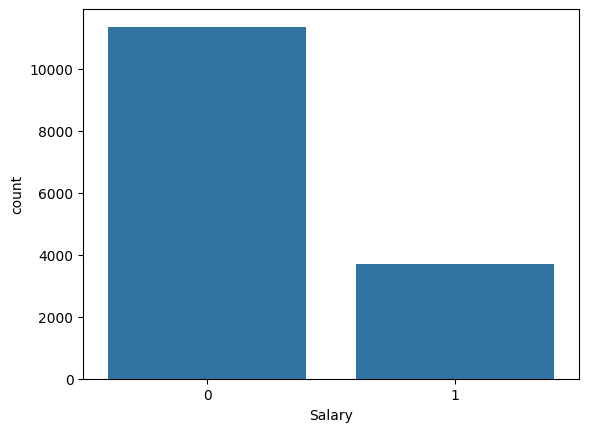

In [50]:
sns.countplot(x='Salary',data=df_test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()


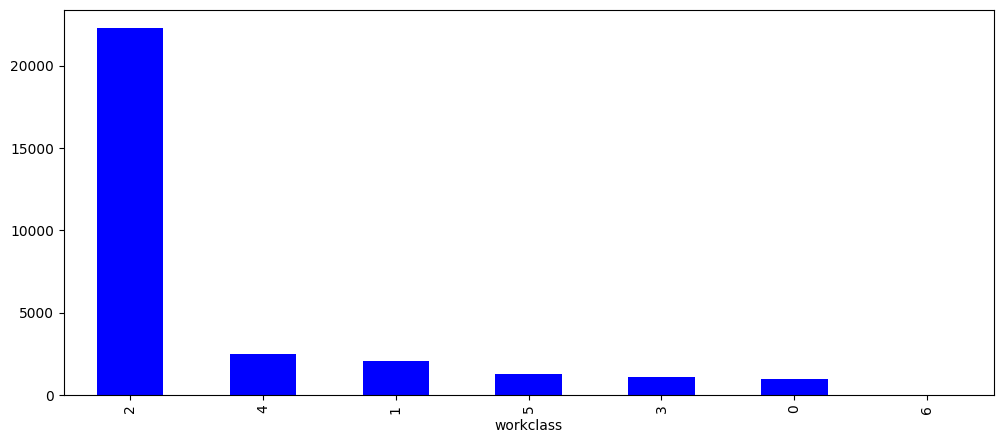

In [55]:

plt.figure(figsize=(12,5))
df_train.workclass.value_counts().plot.bar(color='blue');

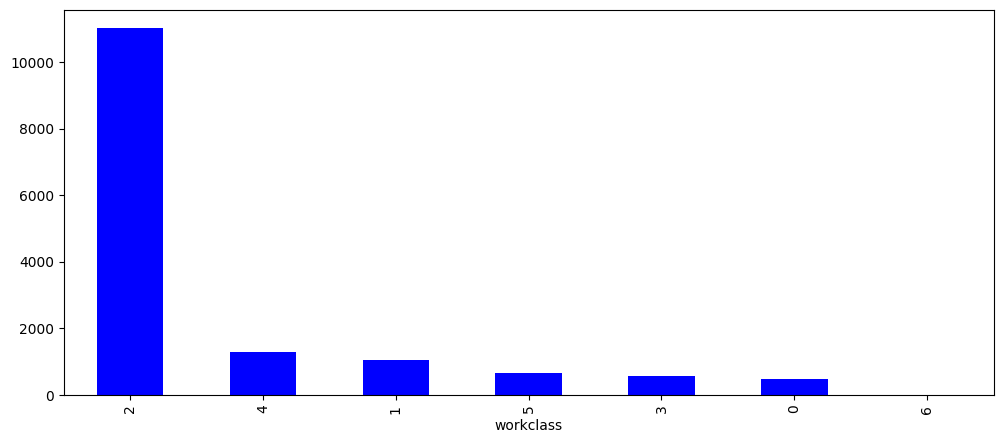

In [56]:
plt.figure(figsize=(12,5))
df_test.workclass.value_counts().plot.bar(color='blue');

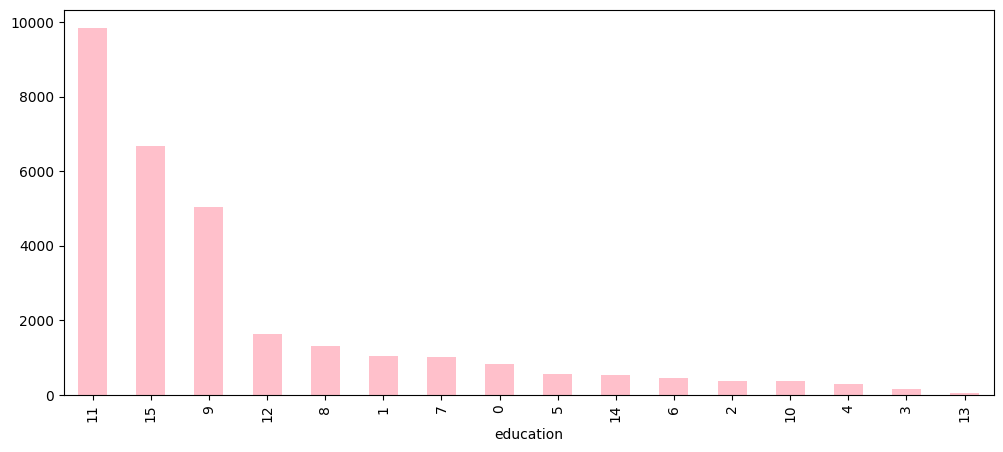

In [53]:
plt.figure(figsize=(12,5))
df_train.education.value_counts().plot.bar(color='pink');

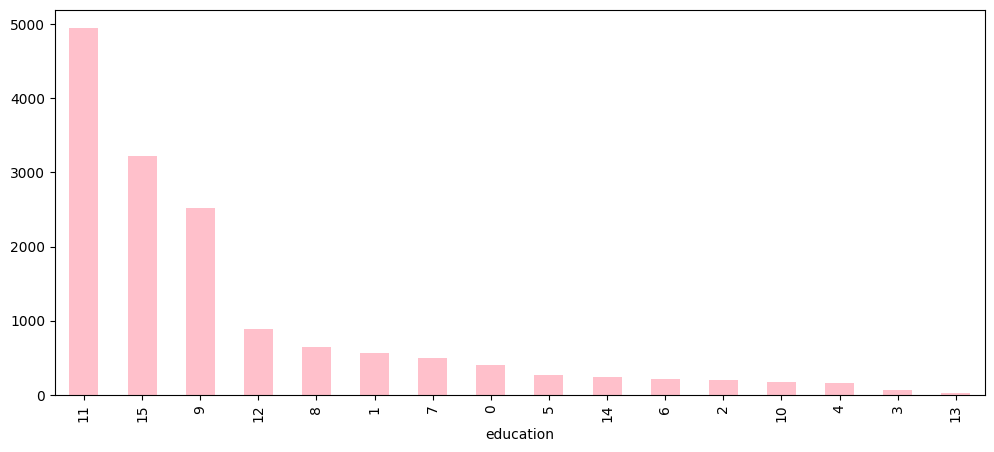

In [54]:
plt.figure(figsize=(12,5))
df_test.education.value_counts().plot.bar(color='pink');

<Axes: xlabel='educationno'>

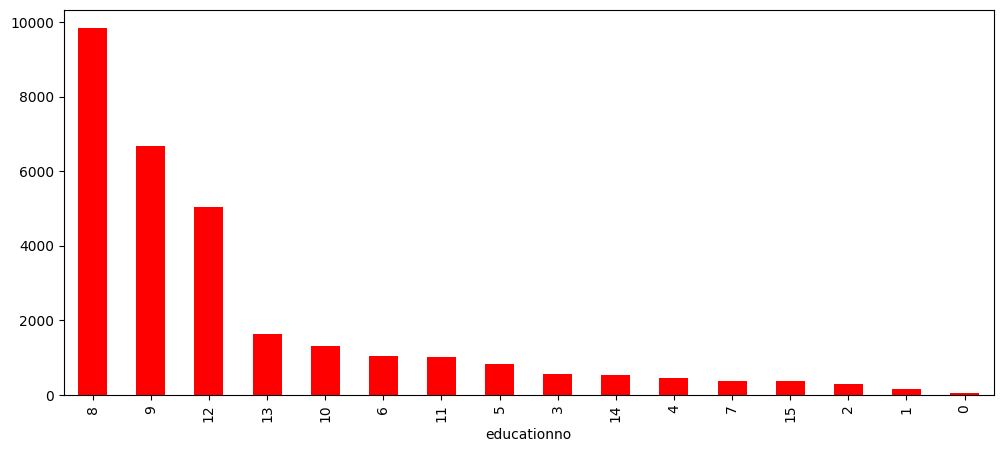

In [58]:
plt.figure(figsize=(12,5))
df_train.educationno.value_counts().plot.bar(color='red')

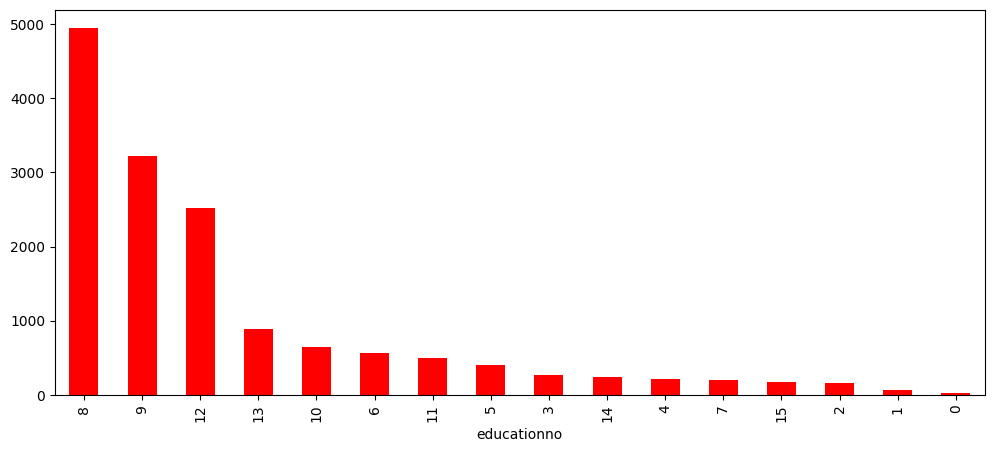

In [60]:
plt.figure(figsize=(12,5))
df_test.educationno.value_counts().plot.bar(color='red');

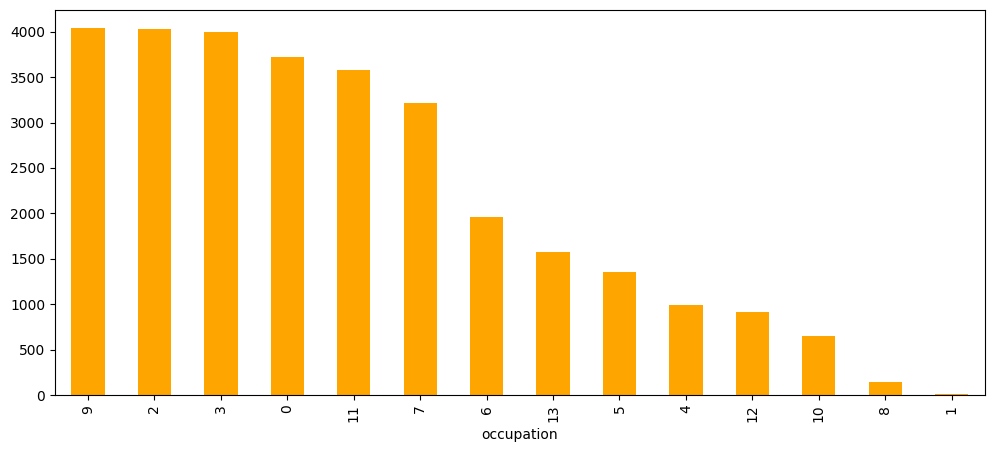

In [61]:
plt.figure(figsize=(12,5))
df_train.occupation.value_counts().plot.bar(color='orange');

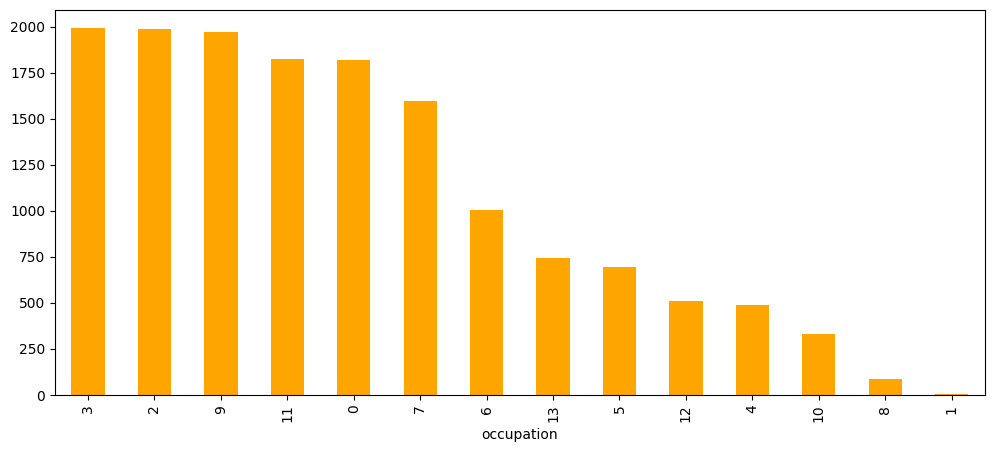

In [62]:
plt.figure(figsize=(12,5))
df_test.occupation.value_counts().plot.bar(color='orange');

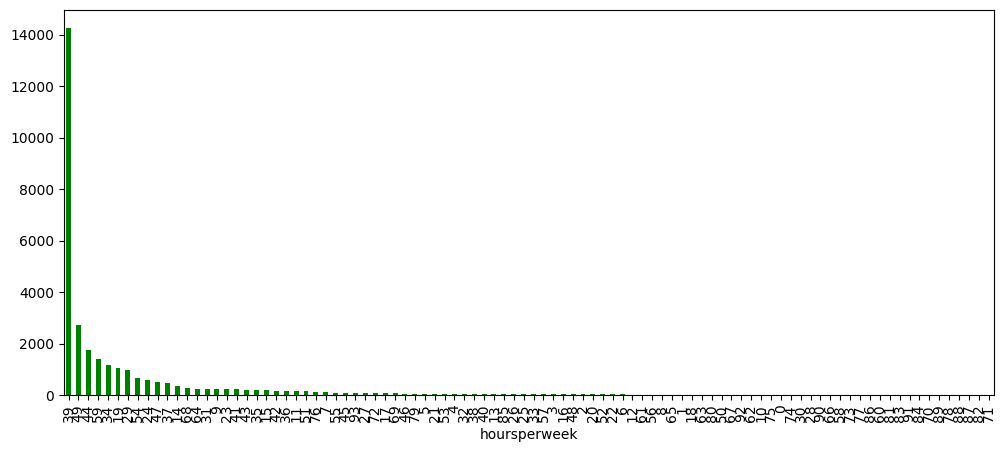

In [63]:
plt.figure(figsize=(12,5))
df_train.hoursperweek.value_counts().plot.bar(color='green');

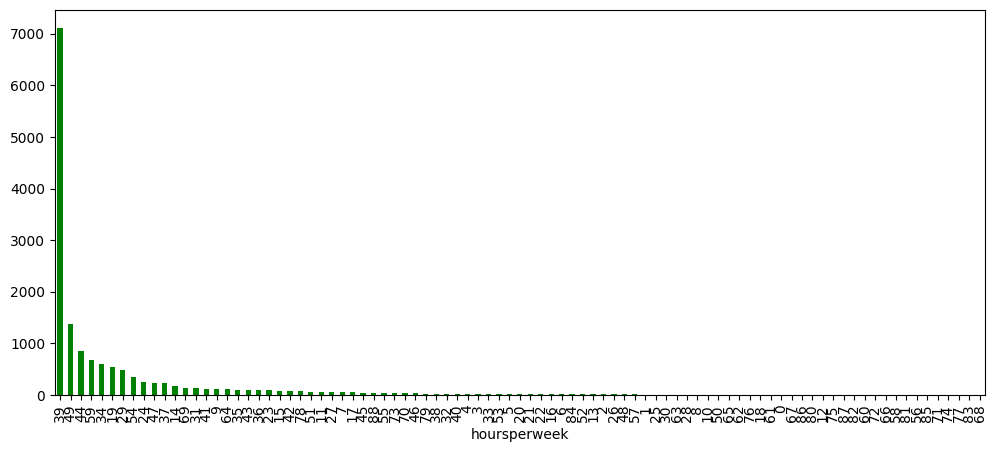

In [64]:
plt.figure(figsize=(12,5))
df_test.hoursperweek.value_counts().plot.bar(color='green');

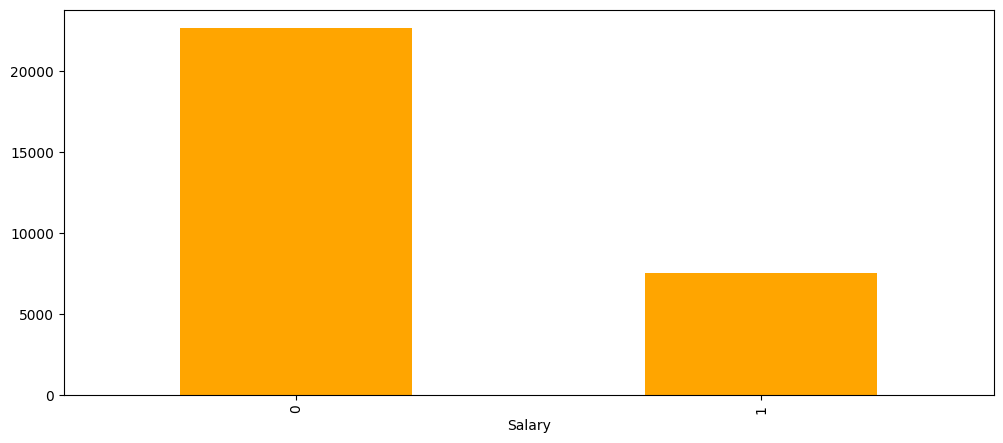

In [70]:
plt.figure(figsize=(12,5))
df_train.Salary.value_counts().plot.bar(color='orange');

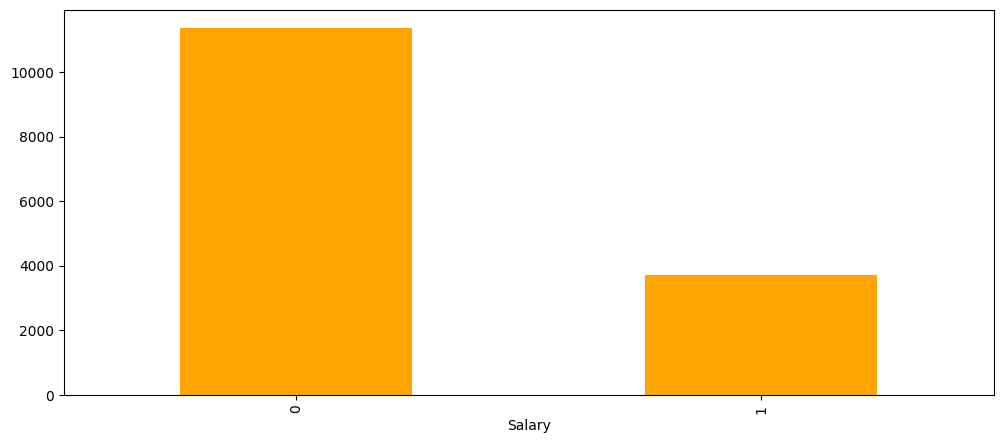

In [71]:
plt.figure(figsize=(12,5))
df_test.Salary.value_counts().plot.bar(color='orange');